In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [6]:
df = pd.read_csv('Breast_cancer_data.csv')
df.sample(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
275,11.89,17.36,76.20,435.6,0.12250,1
378,13.66,15.15,88.27,580.6,0.08268,1
72,17.20,24.52,114.20,929.4,0.10710,0
158,12.06,12.74,76.84,448.6,0.09311,1
112,14.26,19.65,97.83,629.9,0.07837,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [8]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


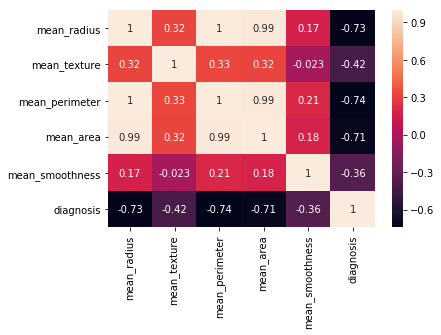

In [9]:
sns.heatmap(df.corr(), annot=True)

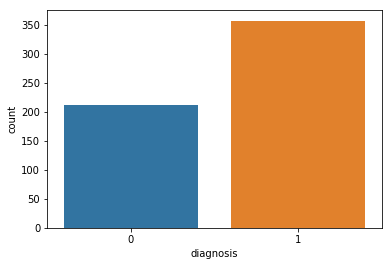

In [10]:
sns.countplot(df['diagnosis'])

In [11]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


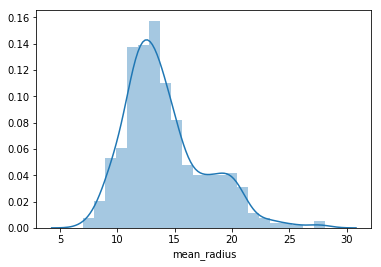

In [12]:
sns.distplot(df['mean_radius'])

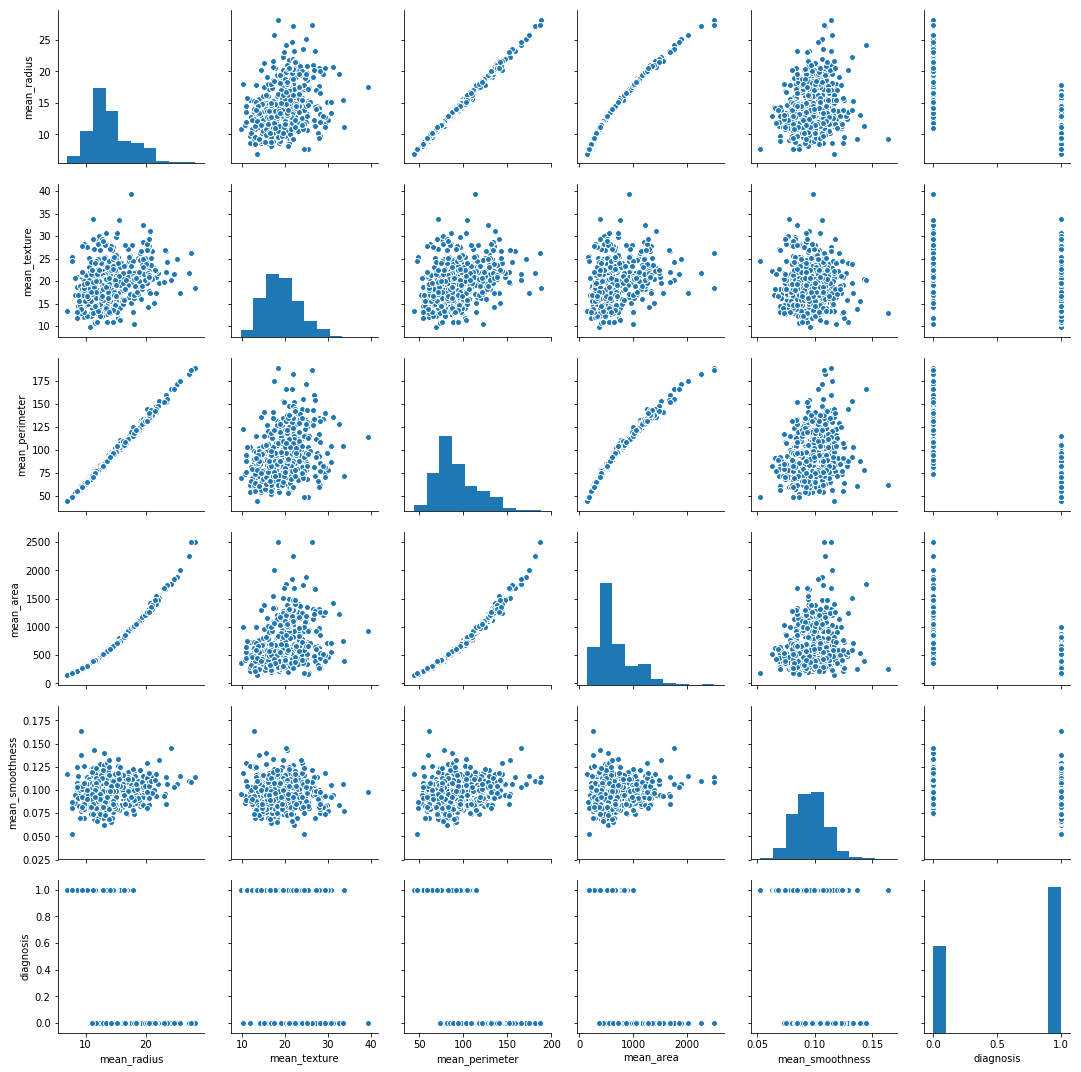

In [13]:
sns.pairplot(df)

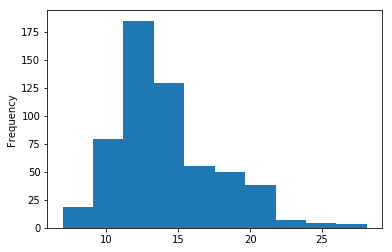

In [14]:
df['mean_radius'].plot.hist()

In [15]:
#import cufflinks as cf

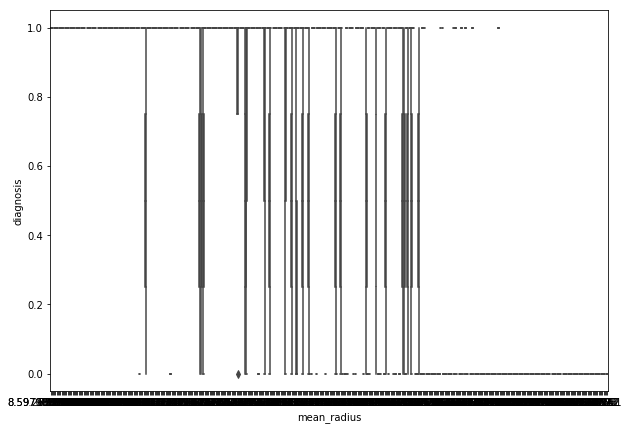

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(df['mean_radius'],df['diagnosis'])

In [17]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [22]:
X = df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness']]
X.shape

(569, 5)

In [23]:
Y = df[['diagnosis']]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.75, random_state = 101)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(426, 5) (143, 5)
(426, 1) (143, 1)


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()

In [29]:
logmodel.fit(x_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
prediction = logmodel.predict(x_test)
prediction

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.89      0.85      0.87        55
          1       0.91      0.93      0.92        88

avg / total       0.90      0.90      0.90       143



In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test, prediction)

array([[47,  8],
       [ 6, 82]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score 

In [41]:
accuracy  = ((accuracy_score(y_test, prediction))*100)
print('Model accuracy :',round(accuracy,2))

Model accuracy : 90.21


In [43]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

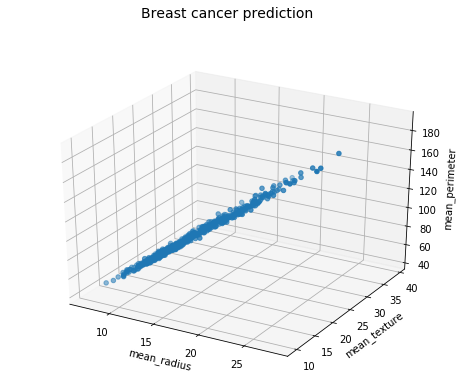

In [66]:
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Breast cancer prediction', fontsize=14)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['mean_radius'], df['mean_texture'], df['mean_perimeter'])



ax.set_xlabel('mean_radius')
ax.set_ylabel('mean_texture')
ax.set_zlabel('mean_perimeter')
plt.show